In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('3.concertriccir2.csv',header=None,names=['x','y','class'])
df.head()

,x,y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [3]:
df.shape

(500, 3)

In [4]:
df.describe()

,x,y,class
count,500.000000,500.000000,500.000000
mean,1.883707,1.869874,0.500000
std,1.931275,1.986852,0.500501
min,-3.950019,-3.935098,0.000000
25%,0.403585,0.426457,0.000000
50%,2.191547,2.109658,0.500000
75%,3.349001,3.388552,1.000000
max,6.712027,7.848278,1.000000


In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [17]:
# Simple Cross Validation

X_1,X_test,y_1,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_tr,X_cv,y_tr,y_cv = train_test_split(X_1,y_1,test_size=0.3,random_state=0)

for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr,y_tr)
    y_pred_cv = knn.predict(X_cv)
    acc = metrics.accuracy_score(y_cv,y_pred_cv,normalize=True)*float(100)
    print('Acc of model at K = %d is %d%%' % (i,acc))

Acc of model at K = 1 is 90%
Acc of model at K = 3 is 84%
Acc of model at K = 5 is 87%
Acc of model at K = 7 is 87%
Acc of model at K = 9 is 81%
Acc of model at K = 11 is 83%
Acc of model at K = 13 is 81%
Acc of model at K = 15 is 80%
Acc of model at K = 17 is 79%
Acc of model at K = 19 is 72%
Acc of model at K = 21 is 73%
Acc of model at K = 23 is 72%
Acc of model at K = 25 is 67%
Acc of model at K = 27 is 65%
Acc of model at K = 29 is 64%


In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_tr,y_tr)
y_pred = knn.predict(X_test)

In [22]:
acc = metrics.accuracy_score(y_test,y_pred,normalize=True)*float(100)
print('Acc of KNN at k = 7 is %d%%' % (acc))

Acc of KNN at k = 7 is 86%


### 10 fold Cross Validation

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [38]:
neighbors = range(1,50,2)

Cv_score = []

for k in neighbors:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    score = cross_val_score(knn,X_train,y_train,cv=3,scoring='accuracy')
    
    Cv_score.append(score.mean())
    
MSE = [1-x for x in Cv_score]

optimal_k = neighbors[MSE.index(min(MSE))]

print('Optimal k value = %d' % (optimal_k))

Optimal k value = 1


In [46]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

acc = metrics.accuracy_score(y_pred,y_pred)*100

print('Accuracy score of knn at k = %d is %d%%' % (optimal_k,acc))

Accuracy score of knn at k = 1 is 100%


In [47]:
print(MSE)

[0.10300993571011097, 0.14586986167932992, 0.15999415546464058, 0.14572374829534385, 0.1515682836547828, 0.16578998636275077, 0.20007792713812578, 0.2084550944866549, 0.2197545295149036, 0.24542178063510622, 0.24551918955776353, 0.25696473796999797, 0.2741087083576855, 0.28847652444963956, 0.31136762127410866, 0.3171147477108903, 0.35135398402493667, 0.35417884278199885, 0.35417884278199885, 0.36844924995129547, 0.3970387687512177, 0.3969900642898889, 0.40556204948373276, 0.4113091759205143, 0.4113091759205143]


In [48]:
print(Cv_score)

[0.896990064289889, 0.8541301383206701, 0.8400058445353594, 0.8542762517046562, 0.8484317163452172, 0.8342100136372492, 0.7999220728618742, 0.7915449055133451, 0.7802454704850964, 0.7545782193648938, 0.7544808104422365, 0.743035262030002, 0.7258912916423145, 0.7115234755503604, 0.6886323787258913, 0.6828852522891097, 0.6486460159750633, 0.6458211572180012, 0.6458211572180012, 0.6315507500487045, 0.6029612312487823, 0.6030099357101111, 0.5944379505162672, 0.5886908240794857, 0.5886908240794857]


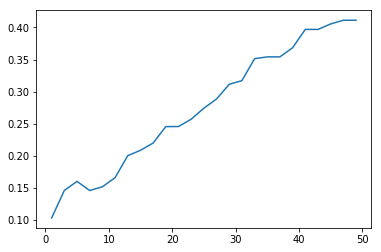

In [49]:
plt.plot(neighbors,MSE)